# COS20083 Advanced Data Analytics

## Assignment 2: Case Study and Algorithm Implementation

### Semester 1, 2022

#### Group Number: <p style ="color: red;"> 11</p>
#### Group Members: <p style ="color: red;"> Lim Zong Xin (101232574), Justin Liu Shan Wei (101231403)</p>

# 1. Introduction

### What is the purpose of the assignment?
### What is the problem to be addressed by this case study?

The purpose of the assignment is to is to build a machine learning model to predict which Place entries represent the same point-of-interest. The problem to be addressed in this case study is to match Point-of-Interests using a simulated dataset from Foursquare which contains the Places and movement of customers of over one-and-a-half million Place entries to predict where new stores and businesses will benefit people the most.

# 2. Data Collection

### Describe the purpose and the process of data collection and understanding here

The purpose of performing data collection and understanding is to gather information in a systematic manner to allow data analysis. The csv files used in this assignment consists of train.csv, test.csv, sample_submission.csv and the pairs.csv. Several python libraries were imported and pandas was used to read the csv files using the pd.read_csv() function. The data types present in the dataframes are then shown using the df.info() function as listed below.

In [ ]:
# Show your code here (Step by Step) 
# Comment each step in your code

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import BallTree
from tqdm import tqdm

In [4]:
#Read csv files
df_train = pd.read_csv('/content/drive/MyDrive/Foursquare Location Matching/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Foursquare Location Matching/test.csv')

sample_submission = pd.read_csv('/content/drive/MyDrive/Foursquare Location Matching/sample_submission.csv')
pairs=pd.read_csv('/content/drive/MyDrive/Foursquare Location Matching/pairs.csv')

In [ ]:
#Display data types in train dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1138812 entries, 0 to 1138811
Data columns (total 13 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   id                 1138812 non-null  object 
 1   name               1138811 non-null  object 
 2   latitude           1138812 non-null  float64
 3   longitude          1138812 non-null  float64
 4   address            742191 non-null   object 
 5   city               839623 non-null   object 
 6   state              718226 non-null   object 
 7   zip                543386 non-null   object 
 8   country            1138801 non-null  object 
 9   url                267724 non-null   object 
 10  phone              342855 non-null   object 
 11  categories         1040505 non-null  object 
 12  point_of_interest  1138812 non-null  object 
dtypes: float64(2), object(11)
memory usage: 112.9+ MB


In [ ]:
#Display data types in test dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          5 non-null      object 
 1   name        5 non-null      object 
 2   latitude    5 non-null      float64
 3   longitude   5 non-null      float64
 4   address     3 non-null      object 
 5   city        3 non-null      object 
 6   state       2 non-null      object 
 7   zip         2 non-null      float64
 8   country     5 non-null      object 
 9   url         1 non-null      object 
 10  phone       1 non-null      float64
 11  categories  5 non-null      object 
dtypes: float64(4), object(8)
memory usage: 608.0+ bytes


In [ ]:
#Display data types in sample_submission dataset
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       5 non-null      object
 1   matches  5 non-null      object
dtypes: object(2)
memory usage: 208.0+ bytes


In [ ]:
#Display data types in pairs dataset
pairs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578907 entries, 0 to 578906
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id_1          578907 non-null  object 
 1   name_1        578907 non-null  object 
 2   latitude_1    578907 non-null  float64
 3   longitude_1   578907 non-null  float64
 4   address_1     475383 non-null  object 
 5   city_1        512928 non-null  object 
 6   state_1       452316 non-null  object 
 7   zip_1         359509 non-null  object 
 8   country_1     578899 non-null  object 
 9   url_1         231806 non-null  object 
 10  phone_1       270022 non-null  object 
 11  categories_1  562613 non-null  object 
 12  id_2          578907 non-null  object 
 13  name_2        578907 non-null  object 
 14  latitude_2    578907 non-null  float64
 15  longitude_2   578907 non-null  float64
 16  address_2     312497 non-null  object 
 17  city_2        367490 non-null  object 
 18  stat

# 3. Exploratory Data Analysis

Exploratory data analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods

In [ ]:
# Show your code here (Step by Step) 
# Comment each step in your code

In [ ]:
#Total number of rows and columns in datasets
print(df_train.shape)
print(df_test.shape)
print(sample_submission.shape)
print(pairs.shape)

(1138812, 13)
(5, 12)
(5, 2)
(578907, 25)


In [ ]:
#Display first few rows of Train dataset
df_train.head()

,id,name,latitude,longitude,address,city,state,zip,country,url,phone,categories,point_of_interest
0,E_000001272c6c5d,Café Stad Oudenaarde,50.859975,3.634196,Abdijstraat,Nederename,Oost-Vlaanderen,9700,BE,NaN,NaN,Bars,P_677e840bb6fc7e
1,E_000002eae2a589,Carioca Manero,-22.907225,-43.178244,NaN,NaN,NaN,NaN,BR,NaN,NaN,Brazilian Restaurants,P_d82910d8382a83
2,E_000007f24ebc95,ร้านตัดผมการาเกด,13.780813,100.484900,NaN,NaN,NaN,NaN,TH,NaN,NaN,Salons / Barbershops,P_b1066599e78477
3,E_000008a8ba4f48,Turkcell,37.844510,27.844202,Adnan Menderes Bulvarı,NaN,NaN,NaN,TR,NaN,NaN,Mobile Phone Shops,P_b2ed86905a4cd3
4,E_00001d92066153,Restaurante Casa Cofiño,43.338196,-4.326821,NaN,Caviedes,Cantabria,NaN,ES,NaN,NaN,Spanish Restaurants,P_809a884d4407fb


In [ ]:
#Display first few rows of Test dataset
df_test.head()

,id,name,latitude,longitude,address,city,state,zip,country,url,phone,categories
0,E_00001118ad0191,Jamu Petani Bagan Serai,5.012169,100.535805,NaN,NaN,NaN,NaN,MY,NaN,NaN,Cafés
1,E_000020eb6fed40,Johnny's Bar,40.434209,-80.564160,497 N 12th St,Weirton,WV,26062.0,US,NaN,NaN,Bars
2,E_00002f98667edf,QIWI,47.215134,39.686088,"Межевая улица, 60",Ростов-на-Дону,NaN,NaN,RU,https://qiwi.com,7.800301e+10,ATMs
3,E_001b6bad66eb98,"Gelora Sriwijaya, Jaka Baring Sport City",-3.014675,104.794374,NaN,NaN,NaN,NaN,ID,NaN,NaN,Stadiums
4,E_0283d9f61e569d,Stadion Gelora Sriwijaya,-3.021727,104.788628,Jalan Gubernur Hasan Bastari,Palembang,South Sumatra,11480.0,ID,NaN,NaN,Soccer Stadiums


In [ ]:
#Total number of missing values in Train dataset
print(df_train.isnull().sum())

id                        0
name                      1
latitude                  0
longitude                 0
address              396621
city                 299189
state                420586
zip                  595426
country                  11
url                  871088
phone                795957
categories            98307
point_of_interest         0
dtype: int64


In [ ]:
#Missing values in pairs dataset
print(pairs.isnull().sum())

id_1                 0
name_1               0
latitude_1           0
longitude_1          0
address_1       103524
city_1           65979
state_1         126591
zip_1           219398
country_1            8
url_1           347101
phone_1         308885
categories_1     16294
id_2                 0
name_2               0
latitude_2           0
longitude_2          0
address_2       266410
city_2          211417
state_2         269218
zip_2           354080
country_2            6
url_2           494057
phone_2         459944
categories_2     75976
match                0
dtype: int64


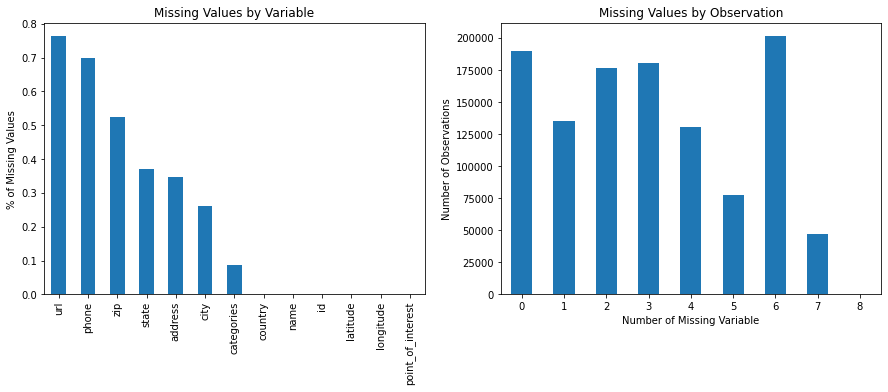

In [ ]:
# How many missing values for each example
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
df_train.isna().mean().sort_values(ascending=False).plot(
    kind="bar", title="Missing Values by Variable", ax=axs[0]
)
axs[0].set_ylabel("% of Missing Values")

df_train.isna().sum(axis=1).value_counts().sort_index().plot(
    ax=axs[1], title="Missing Values by Observation", kind="bar"
)

#Plot visualization for missing values by variable
axs[1].set_xlabel("Number of Missing Variable")
axs[1].set_ylabel("Number of Observations")
plt.xticks(rotation=0)
plt.show()

In [ ]:
#Display number of unique values for each variable for train dataset
df_train.nunique()

id                   1138812
name                  842086
latitude             1121701
longitude            1080273
address               558154
city                   68105
state                  17596
zip                    93329
country                  221
url                   171222
phone                 293454
categories             52578
point_of_interest     739972
dtype: int64

In [ ]:
#Display first few rows of Pairs dataframe
pairs.head()

,id_1,name_1,latitude_1,longitude_1,address_1,city_1,state_1,zip_1,country_1,url_1,...,longitude_2,address_2,city_2,state_2,zip_2,country_2,url_2,phone_2,categories_2,match
0,E_000001272c6c5d,Café Stad Oudenaarde,50.859975,3.634196,Abdijstraat,Nederename,Oost-Vlaanderen,9700,BE,NaN,...,3.635206,NaN,NaN,NaN,NaN,BE,NaN,NaN,Bars,True
1,E_000008a8ba4f48,Turkcell,37.844510,27.844202,Adnan Menderes Bulvarı,NaN,NaN,NaN,TR,NaN,...,27.845560,batı aydın,aydın,NaN,67500,TR,NaN,NaN,Electronics Stores,False
2,E_000023d8f4be44,Island Spa,14.518970,121.018702,"5th Flr, Newport Mall, Resorts World Manila",Pasay City,Metro Manila,NaN,PH,NaN,...,121.019827,NaN,NaN,NaN,NaN,PH,NaN,NaN,Spas,True
3,E_00007dcd2bb53f,TOGO'S Sandwiches,38.257797,-122.064599,"1380 Holiday Ln., Ste. B",Fairfield,CA,94534,US,https://locations.togos.com/ll/US/CA/Fairfield...,...,-122.064606,NaN,Fairfield,CA,NaN,US,NaN,NaN,Sandwich Places,True
4,E_0000c362229d93,Coffee Cat,7.082218,125.610244,F. Torres St.,Davao City,Davao Region,8000,PH,NaN,...,125.611457,E. Jacinto Extension,Davao City,Davao Region,8000,PH,NaN,NaN,"Coffee Shops, Cafés, Dessert Shops",False


In [ ]:
#Statistical summary for Pairs dataset
pairs.describe()

,latitude_1,longitude_1,latitude_2,longitude_2
count,578907.000000,578907.000000,578907.000000,578907.000000
mean,26.104358,24.759940,26.092840,24.785947
std,23.210853,82.244791,23.213278,82.250231
min,-80.857570,-175.141634,-84.927740,-175.160248
25%,6.032218,-61.467652,5.987273,-61.462669
50%,35.623278,30.214258,35.618854,30.220696
75%,41.290456,103.844485,41.285191,103.845012
max,84.928321,178.437698,85.051128,178.440386


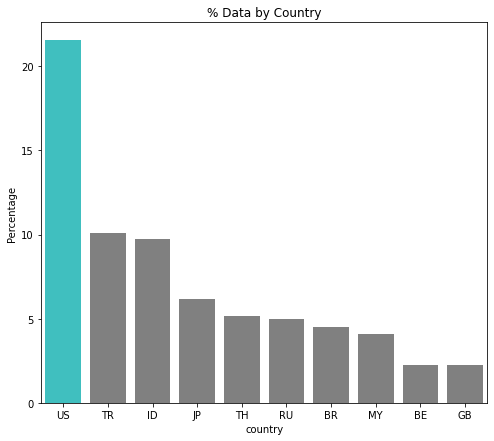

In [ ]:
#Plot percentage of data by country in Train dataset
country_stats=df_train['country'].value_counts()*100/df_train['country'].value_counts().sum()
country_stats=country_stats.head(10)

plt.figure(figsize=(8,7))
color=["gray"]*len(country_stats.index)
color[0]="aqua"
sns.barplot(x=country_stats.index, y=country_stats.values,palette=color, saturation=.5)#, palette=clrs) # color=clrs)
plt.title("% Data by Country")
plt.xlabel('country')
_=plt.ylabel('Percentage')

From the graph it can be seen that US has the most data entries

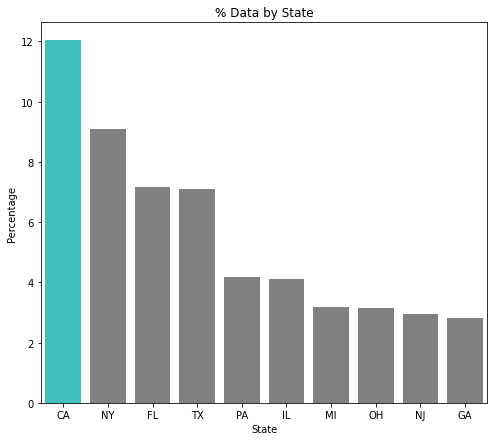

In [ ]:
#Plot percentage of data by state in the US
state_stats=df_train[df_train['country']=='US']['state'].value_counts()*100/df_train[df_train['country']=='US']['state'].value_counts().sum()
state_stats=state_stats.head(10)

plt.figure(figsize=(8,7))
color=["gray"]*len(state_stats.index)
color[0]="aqua"
sns.barplot(x=state_stats.index, y=state_stats.values,palette=color, saturation=.5)#, palette=clrs) # color=clrs)
plt.title("% Data by State")
plt.xlabel('State')
_=plt.ylabel('Percentage')

There are 52578 unique categories


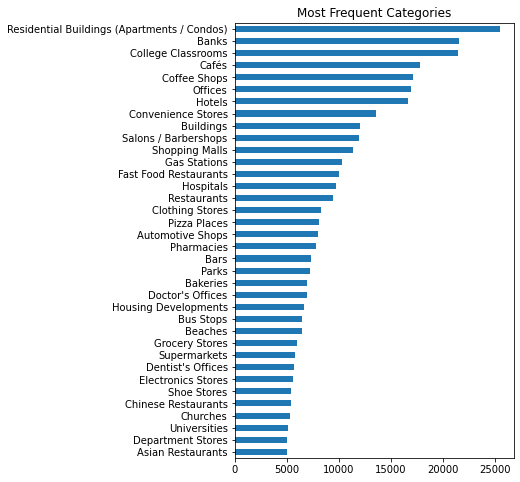

In [ ]:
#Plot the most frequent categories in the Train dataset
print(f'There are {df_train["categories"].nunique()} unique categories')

# Take a look at the most frequent categories
df_train["categories"].value_counts().to_frame().query("categories > 5_000")[
    "categories"
].sort_values(ascending=True).plot(
    kind="barh", title="Most Frequent Categories", figsize=(5, 8)
)
plt.show()

In [ ]:
#Drop unwanted variables from pairs dataset
pairs = pairs.drop(['address_1','city_1','state_1','zip_1','url_1','phone_1','address_2','city_2','state_2','zip_2','url_2','phone_2'],axis=1)
pairs = pairs.fillna("__nan__")
pairs.head()

,id_1,name_1,latitude_1,longitude_1,country_1,categories_1,id_2,name_2,latitude_2,longitude_2,country_2,categories_2,match
0,E_000001272c6c5d,Café Stad Oudenaarde,50.859975,3.634196,BE,Bars,E_da7fa3963561f8,Café Oudenaarde,50.869358,3.635206,BE,Bars,True
1,E_000008a8ba4f48,Turkcell,37.844510,27.844202,TR,Mobile Phone Shops,E_3f12df0b045062,Turkcell,37.838020,27.845560,TR,Electronics Stores,False
2,E_000023d8f4be44,Island Spa,14.518970,121.018702,PH,Spas,E_12453effe251db,Island Spa Theater,14.518330,121.019827,PH,Spas,True
3,E_00007dcd2bb53f,TOGO'S Sandwiches,38.257797,-122.064599,US,Sandwich Places,E_f131dcb7f07be9,Togo's,38.257938,-122.064606,US,Sandwich Places,True
4,E_0000c362229d93,Coffee Cat,7.082218,125.610244,PH,"Cafés, Coffee Shops",E_d52c3c4d53831c,Coffeecat,7.076016,125.611457,PH,"Coffee Shops, Cafés, Dessert Shops",False


In [ ]:
#Perform one-hot encoding on the columns containing string variables to fit into model
pairs.country_1 = pairs.country_1.factorize()[0]
pairs.country_2 = pairs.country_2.factorize()[0]
pairs.categories_1 = pairs.categories_1.factorize()[0]
pairs.categories_2 = pairs.categories_2.factorize()[0]
pairs.name_1 = pairs.name_1.factorize()[0]
pairs.name_2 = pairs.name_2.factorize()[0]
pairs.match = pairs.match.factorize()[0]

pairs.head()


,id_1,name_1,latitude_1,longitude_1,country_1,categories_1,id_2,name_2,latitude_2,longitude_2,country_2,categories_2,match
0,E_000001272c6c5d,0,50.859975,3.634196,0,0,E_da7fa3963561f8,0,50.869358,3.635206,0,0,0
1,E_000008a8ba4f48,1,37.844510,27.844202,1,1,E_3f12df0b045062,1,37.838020,27.845560,1,1,1
2,E_000023d8f4be44,2,14.518970,121.018702,2,2,E_12453effe251db,2,14.518330,121.019827,2,2,0
3,E_00007dcd2bb53f,3,38.257797,-122.064599,3,3,E_f131dcb7f07be9,3,38.257938,-122.064606,3,3,0
4,E_0000c362229d93,4,7.082218,125.610244,2,4,E_d52c3c4d53831c,4,7.076016,125.611457,2,4,1


In [ ]:
#Filling missing values in test and train dataset
df_test.categories = df_test.categories.fillna('__NAN__')
df_test.name = df_test.name.fillna('__NAN__')
df_train['country'].fillna('NA',inplace=True)
df_train.categories=df_train.categories.fillna('__NAN__')
df_train.name = df_train.name.fillna('__NAN__')

### Explain:
1. Description of dataframe
2. Graphical plots of data
3. Descriptive statistics of data

- After reading all the csv files, the total number of rows and columns of all the data in each dataframe is shown by using the df.shape function. It can be seen that df_train has 1138812 rows and 13 columns, df_test has 5 rows and 2 columns, sample_submission has 5 rows and 2 columns and pairs has 578907 rows and 25 columns. The total number of missing data in df_train is shown by the df_train.isnull().sum() function while the total number of missing data in df_test is shown by the df_test.isnull().sum() function.

- Two bar charts are plotted to show which countries have the most data entries. In the train dataset, it can be seen from the graph that the US has the most data entries. Another graph is plotted to see which states have the most data entries in the US, which is the CA state. The graph of most frequent categories is also plotted to show which categories appear most frequently in the Train Dataset which is the Residentual Buildings(Apartments / Condos) category.

# 4. Model Building

### Describe the process of model building

In [ ]:
# Show your code here (Step by Step) 
# Comment each step in your code

In [ ]:
#Select features from pairs dataset to be used 
features = ['latitude_1', 'latitude_2', 'longitude_1', 'longitude_2','country_1','country_2','categories_1','categories_2','name_1','name_2']

#Assign X and y
X = pairs[features]
y = pairs.match

#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initialize Random Forest Classifier Model
model = RandomForestClassifier(n_jobs = -1)

#Fit X and y Train into model
model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [ ]:
# Reference from https://www.kaggle.com/code/andypenrose/spatial-neighbours-benchmark-name-and-category

#Takes the latitude and longtitude values to construct ball tree
tree = BallTree(np.deg2rad(df_test[['latitude', 'longitude']].values), metric='haversine')

In [ ]:
# list for storing the points of interest
pois_out = []
# number of neighbours considered
n = min(20, len(df_test))
# max number of recommended points of interest
max_poi = 2
# max distance
max_dist_cat = 0.0005
max_dist_name = 0.005
max_dist = max(max_dist_cat, max_dist_name)

for i, row in tqdm(df_test.iterrows()):
    distances, indices = tree.query(np.deg2rad(np.c_[row['latitude'], row['longitude']]), k = n)
    poi = []
    for d, j in zip(distances[0], indices[0]):
        if d <= max_dist_cat and row['categories'] != '__NAN__' and (row['categories'] in df_test.categories.iloc[j] or df_test.categories.iloc[j] in row['categories']):
            poi.append(df_test.id.iloc[j])
        elif d <= max_dist_name and row['name'] != '__NAN__' and (row['name'].lower() == df_test.name.iloc[j].lower()):
            poi.append(df_test.id.iloc[j])
        if d > max_dist or len(poi) >= max_poi:
            break

    if len(poi) == 0:
        pois_out.append(row['id'])
    else:
        pois_out.append(' '.join(poi))

5it [00:00, 1391.51it/s]


In [ ]:
#Show matches
sample_submission.matches = pois_out
sample_submission.head()

,id,matches
0,E_00001118ad0191,E_00001118ad0191
1,E_000020eb6fed40,E_000020eb6fed40
2,E_00002f98667edf,E_00002f98667edf
3,E_001b6bad66eb98,E_001b6bad66eb98 E_0283d9f61e569d
4,E_0283d9f61e569d,E_0283d9f61e569d E_001b6bad66eb98


In [ ]:
#Copy output to csv file.
sample_submission.to_csv('submission.csv', index=False)

##1. Partitioning of data
To build the model, the pairs.csv file is used to be split into training and test set. This is done by the train_test_split function from scikitlearn. For the BallTree model, the longtitude and latitude in the test dataset is used to construct the ball tree. A query will then be exceuted with the test dataset and return two arrays which consist of the distances and indices of the neighboring locations. The indices is then used to match the correct locations.

##2. Model selection
The model selected to solve the problem is by using Random Forest Classifier which can be used to maintain accuracy of large propotion of data. Other than that, the team also tried to use the BallTree model. By using BallTree from the sklearn.neighbors library, it can be used to organise the points in a multi-dimensional space and assigned to the tree variable. It divides points based on radial distances to a centre. This is useful to solve our problem as it can approximately determine the actual distance between coordinates, which can be used to find the matches in location.

##3. Model Training
For the Random Forest Classifier model, we have selected several features to be trained after changing the attributes that contained string values to numerical values so that it can be fitted into the model. For the BallTree model, the model is trained by using the latitute and longtitude given in the test dataset to construct the ball tree model. The coordinates are transformed from degree to radian using the deg2rad function as Haversine distance is used in the BallTree function.

##4. Attribute that have greatest effect on matching result 
It can be seen that the attributes that have the greatest effect on the matching results which we used to train the model includes Country, Latitude, Longtitude, Name and Category. For the BallTree model, we used the longtitude and latitude from the test dataset.

<!-- ### Explain: 
1. how the data is partitioned
2. how the model is chosen
3. how the model is trained
4. the attributes that have the greatest effect on the matching results


1. The longtitude and latitude in the train dataset is used to construct the ball tree. A query will then be exceuted with the test dataset and return two arrays which consist of the distances and indices of the neighboring locations. The indices is then used to match the correct locations.

2. The model is chosen as it is able to deal with large datasets. In our case, a large test set will be fitted into our model to be tested. By using BallTree from the sklearn.neighbors library, it can be used to organise the points in a multi-dimensional space and assigned to the tree variable. It divides points based on radial distances to a centre. This is useful to solve our problem as it can approximately determine the actual distance between coordinates, which can be used to find the matches in location.

3. The model is trained by using the latitute and longtitude given in the test dataset to construct the ball tree model. The coordinates are transformed from degree to radian using the deg2rad function as Haversine distance is used in the BallTree function.

4. The attributes that have the greatest effect on the matching results are the longtitude and latitude. -->

# 5. Model Evaluation

### Describe the process of model evaluation

In [ ]:
# Show your code here (Step by Step) 
# Comment each step in your code

In [ ]:
# import library
from sklearn.metrics import jaccard_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
# use the X_test feature to predict the value of y
y_pred = model.predict(X_test)

In [ ]:
# Since the submissions are evaluated by the mean Intersection over Union, which is Jaccard score
# Also include the jaccard_score in the model evaluation

iou_score = jaccard_score(y_test, y_pred)
iou_score

0.41842942718083115

In [ ]:
# Display the classification report to show the accuracy of the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85     79881
           1       0.72      0.50      0.59     35901

    accuracy                           0.79    115782
   macro avg       0.76      0.71      0.72    115782
weighted avg       0.78      0.79      0.77    115782



In [ ]:
# Display the confusion matrix to show how many observation it correctly predicted

cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
cm

,0,1
0,73046,6835
1,18019,17882


### Explain: 
1. the performance of the model created
* The model used above is Random Forest model. From the IoU score, we know that the similarity of y_pred and y_test is not high. And from classification report, we can tell the model has good performance, it achieves around 79% of accuracy. By looking at the Confusion Matrix, although it correctly predicted the True Positive and True Negative, still a lot of observations are wrongly labeled.


2. how the model can be used to predict or match the POIs accurately
* Our model takes in the features to train the relationship between features and match column. Our model do not directly predict or match the POI, instead if the model predicted the match output is true, that's mean the POI is accurate and correctly predicted.

# 6. Model Validation (Challenge)

### Describe the process of model validation

In [ ]:
# Show your code here (Step by Step) 
# Comment each step in your code

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
#Perform K-Fold cross validation
kf=KFold(n_splits=10)
score=cross_val_score(model,X_test,y_test,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.76301926 0.76638743 0.75626188 0.76161686 0.76075315 0.75367075
 0.75764381 0.75868026 0.76049404 0.75945759]
Average Cross Validation score :0.7597985022742743


### Explain: 
###1. The Cross-Validation Approach
* The cross-validation approach I applied here is K-fold, the number of folds is set to 10, and using the random forest model to do the model validation. The dataset applied here is the test set after getting split from pairs.csv.

###2. The matching or predictive performance of the model created
*  The average cross validation score of the random forest model is around 0.76. The model performance is decent, can be better if we have more useful features and less missing values.

# 7. Discussion

### Identify:
###1. The factors that have significant influences on location matching
- The factors that infuences the location matching significantly are the latitude and longitude attributes.

###2. Any interesting observation from this challenge
- From this challenge, we know that the commercial points-of-interest (POI) is a immportant information to business. By knowing each shop's POI, we know that which category of shops have better place to set up their shops. We use longitude and latitude to calculate the POI, and see if it matches the other shop's POI, then the business owner can find the same POI to set up their shop.

###Explain:
###1. The limitations and weaknesses of the modelling approach
- Random Forest Classification model: The pais dataset contained many data with null values, which will cause the prediction to be inaccurate.
- BallTree model: The accuracy score cannot be obtained using our validation and evaluation methods used.

###2. The steps taken to improve the matching accuracy in your modelling approach
- From the pairs dataset, we have chosen only a few attributes to be used and dropped the attributes that are of no use. This will increase the accuracy as there are less missing values.

### Elaborate:
###1. The experience in participating in a Kaggle challenge
- The experience in participating in this particular Kaggle challenge is very interesting. On the competition page, there are many different code posted by other data scientists or users which can help one another to come up with ideas to solve the problem. The team has seen how many other data scientist develop their machine learning models.

###2. The discussion and submission score on Kaggle (include the screenshot or link to your submission here)
[Kaggle Submission](https://www.kaggle.com/code/lzx932001/2022-s1-cos20083-assignment2-group11?scriptVersionId=96005490)
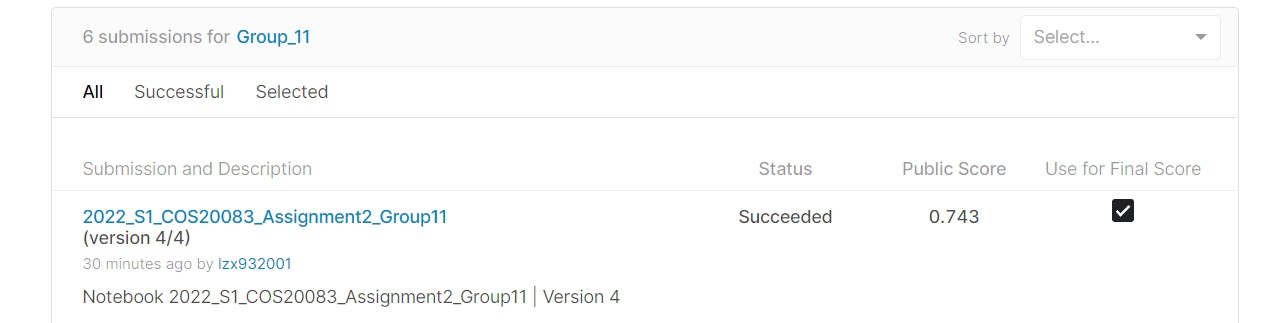

###3. The improvements that need to be done in order to win the challenge
- We should increase our knowledge by performing more tasks related to data science. This can help us to gain more experience in participating in a real life data science problem. Our model should also be able to return a high accuracy to win this challenge.

# Team contribution


##Participation Percentage:

##(1) Justin Liu Shan Wei (50%)
Tasks: 
- Introduction
- Data collection and understanding
- Exploratory Data Analysis
- Model Building
- Discussion

##(2) Lim Zong Xin (50%)
Tasks: 
- Model building
- Model evaluation
- Model validation
- Discussion